In [ ]:
import os
import csv
import sys

path = 'offtarget'

fileOut=open('offtarget.WXS.csv',"w")
fileOut.write('ID,cov\n')

for f in os.listdir(path):
    file=open("./offtarget/"+f)
    reader=csv.reader(file)
    cov=0.0
    count=0
    for line in reader:
            x=int(line[1])
            y=int(line[2])
            if y>x:
                if line[3]=="":
                    n=0.0
                else:
                    n=float(line[3])
                cov+=n/(y-x)
                count+=1
        
    fileOut.write(f.replace('.offtarget.cov','')+","+str(cov/count))
    fileOut.write("\n")

In [1]:
import pandas as pd
df = pd.read_csv('offtarget.WXS.csv')
df.head()

,ID,cov
0,003860a34c9b244a5d8435b220ca5673,5.390855
1,04dad306f9be80db39f4be578091aa11,4.966536
2,08886fe521e2ff176295468dc519d9f3,3.162184
3,09f52a751a3bd08f2fd4dcc61a046ed0,4.683656
4,0e66d92c70e71ca68bc7df03f140ac23,3.325347


In [2]:
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
metadata.head()

,Unnamed: 0,patientBarcode,ID,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,clinical_data_Breslow_thickness,clinical_data_cause_of_death,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,1,TCGA-05-4244,C347.TCGA-05-4244-01A-01D-1105-08.5,TCGA-05-4244-01A-01D-1105-08,WGS,NaN,NaN,NaN,NaN,NaN,...,70.0,TCGA,LUAD,1,8.0,7.0,7.0,7.0,34040b83-7e8a-4264-a551-b16621843e28,NaN
1,2,TCGA-05-4420,C347.TCGA-05-4420-01A-01D-1265-08.3,TCGA-05-4420-01A-01D-1265-08,WGS,NaN,NaN,NaN,NaN,NaN,...,41.0,TCGA,LUAD,1,7.0,6.0,7.0,5.0,3d2aa654-1b5f-4eb4-a1c2-af31f5760069,NaN
2,3,TCGA-05-4430,C347.TCGA-05-4430-01A-02D-1265-08.3,TCGA-05-4430-01A-02D-1265-08,WGS,NaN,NaN,NaN,NaN,NaN,...,59.0,TCGA,LUAD,1,8.0,7.0,7.0,7.0,3a23cdb5-2327-45ac-b0b5-d4afe038c757,NaN
3,4,TCGA-05-5423,C509.TCGA-05-5423-01A-01D-1625-08.1,TCGA-05-5423-01A-01D-1625-08,WGS,NaN,NaN,NaN,NaN,NaN,...,65.0,TCGA,LUAD,1,8.0,7.0,8.0,7.0,33e3f736-7990-4f7a-ac35-863247566541,NaN
4,5,TCGA-17-Z004,C347.TCGA-17-Z004-01A-01W-0746-08.1,TCGA-17-Z004-01A-01W-0746-08,WGS,NaN,NaN,NaN,NaN,NaN,...,NaN,TCGA,LUAD,0,NaN,NaN,NaN,NaN,0d96def2-cf0a-4659-94e5-f08744c57cc6,NaN


In [ ]:
data=pd.merge(df, metadata, on='ID')
data.head()

In [3]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov", data=data)
sns.stripplot(x="disease", y="cov", data=data, palette=["black"], jitter=0.05)


NameError: name 'data' is not defined

In [57]:
#gi|23898|emb|X12811.1|  28      2
#gi|23898|emb|X12811.1|  29      2
#X12811    5S              2231 bp
#Human 5.8S ribosomal RNA J01866.1 159 bp 
#Human 28S ribosomal RNA gene  5025 bp M11167.1
# X03205.1 Human 18S ribosomal RNA 1869 bp 

import os
import csv
import sys

path = './rDNA/cov/'

fileOut_5S=open('5S.WXS.csv',"w")
fileOut_5S.write('ID,cov.5S\n')

fileOut_58S=open('58S.WXS.csv',"w")
fileOut_58S.write('ID,cov.58S\n')

fileOut_28S=open('28S.WXS.csv',"w")
fileOut_28S.write('ID,cov.28S\n')

fileOut_18S=open('18S.WXS.csv',"w")
fileOut_18S.write('ID,cov.18S\n')

for f in os.listdir(path):
    file=open("./rDNA/cov/"+f)
    reader=csv.reader(file, delimiter="\t")
    cov_5S=0
    cov_58S=0
    cov_28S=0
    cov_18S=0
    
    for line in reader:
        ref=line[0]
        n=int(line[2])
        if ref=="gi|23898|emb|X12811.1|":
            cov_5S+=n
        elif ref=="J01866.1":
            cov_58S+=n
        elif ref=="M11167.1":
            cov_28S+=n
        elif ref=="X03205.1":
            cov_18S+=n
        else:
            print "ERROR"
            print line
            sys.exit(1)
            
        
    fileOut_5S.write(f.replace('.sort.rDNA.cov','')+","+str(cov_5S/2231.0))
    fileOut_5S.write("\n")
    
    fileOut_58S.write(f.replace('.sort.rDNA.cov','')+","+str(cov_58S/159.0))
    fileOut_58S.write("\n")
    
    fileOut_28S.write(f.replace('.sort.rDNA.cov','')+","+str(cov_28S/5025.0))
    fileOut_28S.write("\n")
    
    fileOut_18S.write(f.replace('.sort.rDNA.cov','')+","+str(cov_18S/1869.0))
    fileOut_18S.write("\n")

#003860a34c9b244a5d8435b220ca5673,1062574
    
#003860a34c9b244a5d8435b220ca5673 12709

    

In [8]:
import pandas as pd
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
df_5S = pd.read_csv('5S.WXS.csv')
df_58S = pd.read_csv('58S.WXS.csv')
df_28S = pd.read_csv('28S.WXS.csv')
df_18S = pd.read_csv('18S.WXS.csv')

df = pd.read_csv('offtarget.WXS.csv')
data=pd.merge(df_5S, metadata, on='ID')
data=pd.merge(data, df, on='ID')
data=pd.merge(data, df_58S, on='ID')
data=pd.merge(data, df_28S, on='ID')
data=pd.merge(data, df_18S, on='ID')


data['cov.5S.norm'] = data['cov.5S']/data['cov']
data['cov.58S.norm'] = data['cov.58S']/data['cov']
data['cov.28S.norm'] = data['cov.28S']/data['cov']
data['cov.18S.norm'] = data['cov.18S']/data['cov']


data.head()



,ID,cov.5S,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,clinical_data_Breslow_thickness,...,patient_uuid,slides_0,cov,cov.58S,cov.28S,cov.18S,cov.5S.norm,cov.58S.norm,cov.28S.norm,cov.18S.norm
0,003860a34c9b244a5d8435b220ca5673,5.696549,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,NaN,...,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN,5.390855,2834.899371,70.610746,130.710005,1.056706,525.871894,13.098245,24.246617
1,04dad306f9be80db39f4be578091aa11,16.363066,246,TCGA-BH-A1EY,TCGA-BH-A1EY-01A-11D-A13L-09,WGS,NaN,NaN,NaN,NaN,...,0741b5db-4405-42ba-b63a-c6ee4f341480,NaN,4.966536,946.503145,194.582090,261.747994,3.294664,190.576112,39.178632,52.702324
2,08886fe521e2ff176295468dc519d9f3,7.967727,197,TCGA-A7-A13G,TCGA-A7-A13G-01B-04D-A22N-09,WGS,NaN,NaN,NaN,NaN,...,6cd9baf5-bbe0-4c1e-a87f-c53b3af22890,NaN,3.162184,3307.685535,18.621891,157.719101,2.519691,1046.013017,5.888933,49.876638
3,09f52a751a3bd08f2fd4dcc61a046ed0,13.939041,256,TCGA-C8-A1HK,TCGA-C8-A1HK-01A-21D-A13L-09,WGS,NaN,NaN,NaN,NaN,...,52c35691-efca-42f5-a03e-02c9f872275c,NaN,4.683656,984.308176,200.056119,286.082397,2.976103,210.158105,42.713670,61.081007
4,0e66d92c70e71ca68bc7df03f140ac23,13.560287,188,TCGA-A2-A25D,TCGA-A2-A25D-01A-12D-A16D-09,WGS,NaN,NaN,NaN,NaN,...,3b963d72-ba5c-467b-83c9-fbdb462510a3,NaN,3.325347,856.628931,165.016119,286.418941,4.077857,257.605910,49.623736,86.132057


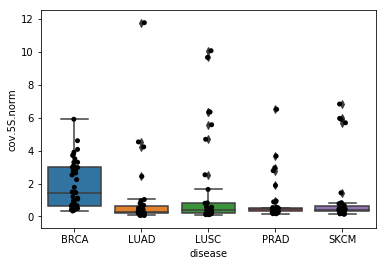

In [30]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.5S.norm", data=data)
sns.stripplot(x="disease", y="cov.5S.norm", data=data, palette=["black"], jitter=0.05)

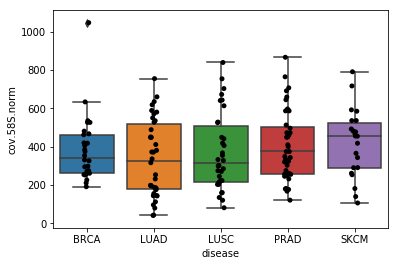

In [42]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.58S.norm", data=data)
sns.stripplot(x="disease", y="cov.58S.norm", data=data, palette=["black"], jitter=0.05)

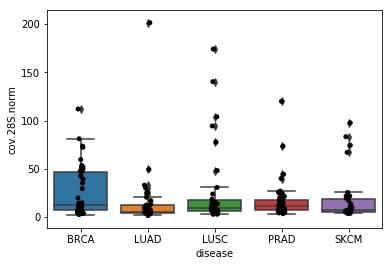

In [9]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.28S.norm", data=data)
sns.stripplot(x="disease", y="cov.28S.norm", data=data, palette=["black"], jitter=0.05)

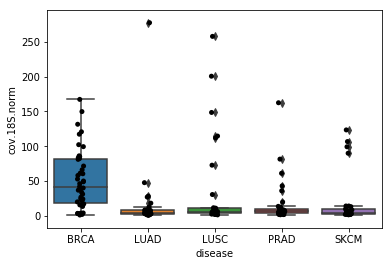

In [11]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.18S.norm", data=data)
sns.stripplot(x="disease", y="cov.18S.norm", data=data, palette=["black"], jitter=0.05)

(0.9540977082486075, 2.4853044972211593e-99)

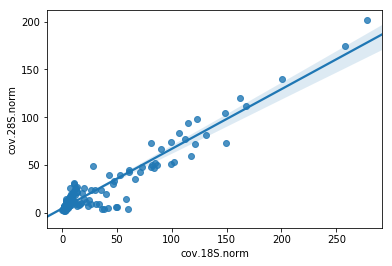

In [17]:
import scipy.stats  as stats

sns.regplot(x="cov.18S.norm", y="cov.28S.norm", data=data)
stats.pearsonr(data['cov.18S.norm'], data['cov.28S.norm'])

(0.9400798941418357, 7.492126963407139e-89)

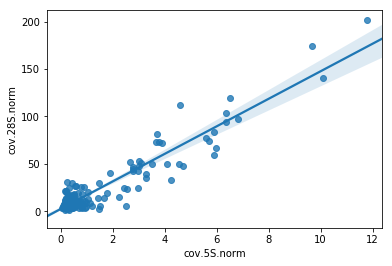

In [20]:
import scipy.stats  as stats

sns.regplot(x="cov.5S.norm", y="cov.28S.norm", data=data)
stats.pearsonr(data['cov.5S.norm'], data['cov.28S.norm'])

(-0.007060460369000751, 0.9233905576505903)

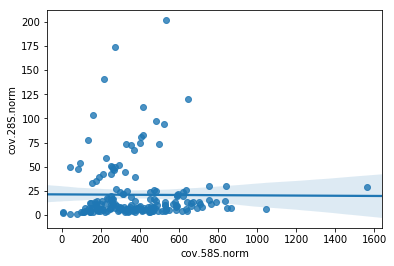

In [21]:
import scipy.stats  as stats

sns.regplot(x="cov.58S.norm", y="cov.28S.norm", data=data)
stats.pearsonr(data['cov.58S.norm'], data['cov.28S.norm'])

In [16]:
#gi|23898|emb|X12811.1|  28      2
#gi|23898|emb|X12811.1|  29      2
#MT 16569 bp    DNA



import os
import csv
import sys

path = './MT/cov/'

fileOut=open('MT.WXS.csv',"w")
fileOut.write('ID,cov.MT\n')



for f in os.listdir(path):
    file=open("./MT/cov/"+f)
    reader=csv.reader(file, delimiter="\t")
    cov=0
    
    
    for line in reader:
        ref=line[0]
        n=int(line[2])
        cov+=n
        
            
        
    fileOut.write(f.replace('.sort.MT.cov','')+","+str(cov/16569.0))
    fileOut.write("\n")
    
    

In [20]:
import pandas as pd
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
df_MT = pd.read_csv('MT.WXS.csv')

df_MT.head()

df = pd.read_csv('offtarget.WXS.csv')
data=pd.merge(df_MT, metadata, on='ID')
data=pd.merge(df, data, on='ID')


data['cov.MT.norm'] = data['cov.MT']/data['cov']

data.head()



,ID,cov,cov.MT,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,...,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0,cov.MT.norm
0,003860a34c9b244a5d8435b220ca5673,5.390855,60.111896,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN,11.150716
1,04dad306f9be80db39f4be578091aa11,4.966536,194.140141,246,TCGA-BH-A1EY,TCGA-BH-A1EY-01A-11D-A13L-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,7.0,6.0,7.0,6.0,0741b5db-4405-42ba-b63a-c6ee4f341480,NaN,39.089646
2,08886fe521e2ff176295468dc519d9f3,3.162184,43.398334,197,TCGA-A7-A13G,TCGA-A7-A13G-01B-04D-A22N-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,8.0,6.0,7.0,5.0,6cd9baf5-bbe0-4c1e-a87f-c53b3af22890,NaN,13.724165
3,09f52a751a3bd08f2fd4dcc61a046ed0,4.683656,295.264168,256,TCGA-C8-A1HK,TCGA-C8-A1HK-01A-21D-A13L-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,8.0,6.0,7.0,6.0,52c35691-efca-42f5-a03e-02c9f872275c,NaN,63.041392
4,0e66d92c70e71ca68bc7df03f140ac23,3.325347,434.680186,188,TCGA-A2-A25D,TCGA-A2-A25D-01A-12D-A16D-09,WGS,NaN,NaN,NaN,...,TCGA,BRCA,1,9.0,8.0,9.0,8.0,3b963d72-ba5c-467b-83c9-fbdb462510a3,NaN,130.717258


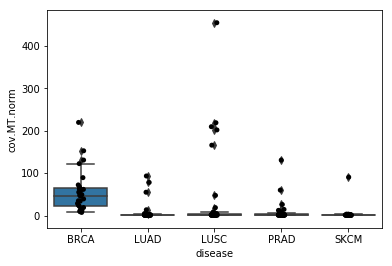

In [22]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.MT.norm", data=data)
sns.stripplot(x="disease", y="cov.MT.norm", data=data, palette=["black"], jitter=0.05)

In [33]:
df_MT_div = pd.read_csv('MT.diversity.WXS.csv')
df_MT_div.head()
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
data=pd.merge(df_MT_div, metadata, on='ID')
data.head()

    

,ID,average.MT.div,max.MT.div,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,003860a34c9b244a5d8435b220ca5673,0.285526,0.971534,194,TCGA-A2-A4S1,TCGA-A2-A4S1-01A-21D-A25Q-09,WGS,NaN,NaN,NaN,...,66.0,TCGA,BRCA,1,9.0,8.0,8.0,7.0,843c8f16-5e59-40d4-9ecc-8a75375156f6,NaN
1,04dad306f9be80db39f4be578091aa11,0.014886,0.226411,246,TCGA-BH-A1EY,TCGA-BH-A1EY-01A-11D-A13L-09,WGS,NaN,NaN,NaN,...,79.0,TCGA,BRCA,1,7.0,6.0,7.0,6.0,0741b5db-4405-42ba-b63a-c6ee4f341480,NaN
2,08886fe521e2ff176295468dc519d9f3,0.325265,1.000000,197,TCGA-A7-A13G,TCGA-A7-A13G-01B-04D-A22N-09,WGS,NaN,NaN,NaN,...,79.0,TCGA,BRCA,1,8.0,6.0,7.0,5.0,6cd9baf5-bbe0-4c1e-a87f-c53b3af22890,NaN
3,09f52a751a3bd08f2fd4dcc61a046ed0,0.008254,0.057301,256,TCGA-C8-A1HK,TCGA-C8-A1HK-01A-21D-A13L-09,WGS,NaN,NaN,NaN,...,NaN,TCGA,BRCA,1,8.0,6.0,7.0,6.0,52c35691-efca-42f5-a03e-02c9f872275c,NaN
4,0e66d92c70e71ca68bc7df03f140ac23,0.110097,0.793128,188,TCGA-A2-A25D,TCGA-A2-A25D-01A-12D-A16D-09,WGS,NaN,NaN,NaN,...,90.0,TCGA,BRCA,1,9.0,8.0,9.0,8.0,3b963d72-ba5c-467b-83c9-fbdb462510a3,NaN


Text(0.5,1,'HOW TO NORM. SUBSAMPLE?')

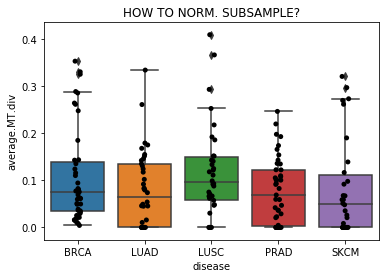

In [34]:
##ID,average.MT.div,max.MT.div

import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="average.MT.div", data=data)
ax=sns.stripplot(x="disease", y="average.MT.div", data=data, palette=["black"], jitter=0.05)
ax.set_title('HOW TO NORM. SUBSAMPLE?')



In [11]:
import os
import csv
import sys

path = './MT.RNA.Seq/cov/'

fileOut=open('MT.RNA.Seq.csv',"w")
fileOut.write('ID,cov.MT\n')



for f in os.listdir(path):
    file=open("./MT.RNA.Seq/cov/"+f)
    reader=csv.reader(file, delimiter="\t")
    cov=0
    
    
    for line in reader:
        ref=line[0]
        n=int(line[2])
        cov+=n
        
            
        
    fileOut.write(f.replace('.sort.MT.cov','')+","+str(cov/16569.0))
    fileOut.write("\n")

In [13]:
import pandas as pd
metadata=pd.read_csv('../outcomes/PILOT.RNASeq.clean.metadata.csv')
df_MT = pd.read_csv('MT.RNA.Seq.csv')

df_MT.head()

data=pd.merge(df_MT, metadata, on='ID')



data.head()

,ID,cov.MT,Unnamed: 0,patientBarcode,sample,platform,clinical_data_age_at_diagnosis,clinical_data_age_at_initial_pathologic_diagnosis,clinical_data_agebegansmokinginyears,clinical_data_Breslow_thickness,...,clinical_data_years_to_birth,datasource,disease,expData,ips_ctla4_neg_pd1_neg,ips_ctla4_neg_pd1_pos,ips_ctla4_pos_pd1_neg,ips_ctla4_pos_pd1_pos,patient_uuid,slides_0
0,022dd75d-0977-40b5-8804-bf0a281c149b_gdc_realn...,446.944294,9,TCGA-21-1082,TCGA-21-1082-01A-01R-0692-07,RNASeq,NaN,NaN,NaN,NaN,...,61.0,TCGA,LUSC,1,8.0,7.0,8.0,6.0,0e2ee54a-51c9-4868-842d-a2a1c1cfb016,NaN
1,06ab660e-2766-4c97-8f2e-b8495ddc0880_gdc_realn...,358.926912,230,TCGA-BF-A5EP,TCGA-BF-A5EP-01A-12R-A27Q-07,RNASeq,NaN,NaN,NaN,70.0,...,75.0,TCGA,SKCM,1,8.0,6.0,8.0,6.0,888ef0fc-fc84-4afb-a369-695fee5ae4f6,NaN
2,0ade1371-b218-4f01-a39e-b503d30d24e0_gdc_realn...,209.912910,373,TCGA-HC-7210,TCGA-HC-7210-01A-11R-2118-07,RNASeq,NaN,NaN,NaN,NaN,...,74.0,TCGA,PRAD,1,7.0,6.0,7.0,5.0,6a5af80e-07ad-4cd3-aaab-5db1090835d9,NaN
3,0afa74a0-7a7c-4b48-a253-45070049ceea_gdc_realn...,150.618806,281,TCGA-E2-A9RU,TCGA-E2-A9RU-01A-11R-A41B-07,RNASeq,NaN,NaN,NaN,NaN,...,90.0,TCGA,BRCA,1,7.0,6.0,7.0,6.0,6f18f96e-c0c9-4cc4-9fb2-cba8949d5402,NaN
4,0e0dd65a-4a41-4f6c-9ff9-d3cea84de4d7_gdc_realn...,136.492546,381,TCGA-HC-7817,TCGA-HC-7817-01B-11R-A29R-07,RNASeq,NaN,NaN,NaN,NaN,...,52.0,TCGA,PRAD,1,9.0,7.0,8.0,7.0,f3aa40b9-7b4d-465a-b7c9-591aebdb56c2,NaN


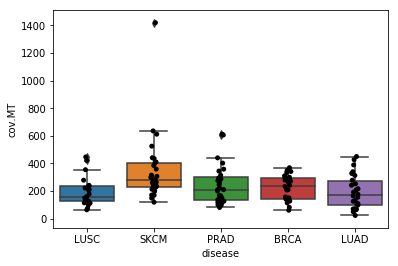

In [15]:
import seaborn as sns  #be sure version >=0.9
sns.boxplot(x="disease", y="cov.MT", data=data)
sns.stripplot(x="disease", y="cov.MT", data=data, palette=["black"], jitter=0.05)